# Data Analysis of Employee Data and Predicting the Promotion Possibility 

# Importing Basic libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading data
data= pd.read_csv('C:/Users/Stevelal/Downloads/employee data.csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [3]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

# Variable describtion and understanding the variables

1. employee_id= Unique ID for employee	
2. department= Department of employee
3. region= Region of employment (unordered)
4. education= Education Level
5. gender= Gender of Employee
6. recruitment_channel= Channel of recruitment for employee
7. no_of_trainings= no of other trainings completed in previous year on soft skills, technical skills etc.
8. age= Age of Employee
9. previous_year_rating= Employee Rating for the previous year
10. length_of_service= Length of service in years
11. awards_won?= if awards won during previous year then 1 else 0
12. avg_training_score= Average score in current training evaluations
13. is_promoted= Recommended for promotion

In [4]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [5]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique(), sep='=', flush=False)

department=['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region=['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education=["Master's & above" "Bachelor's" nan 'Below Secondary']
gender=['f' 'm']
recruitment_channel=['sourcing' 'other' 'referred']


<AxesSubplot:>

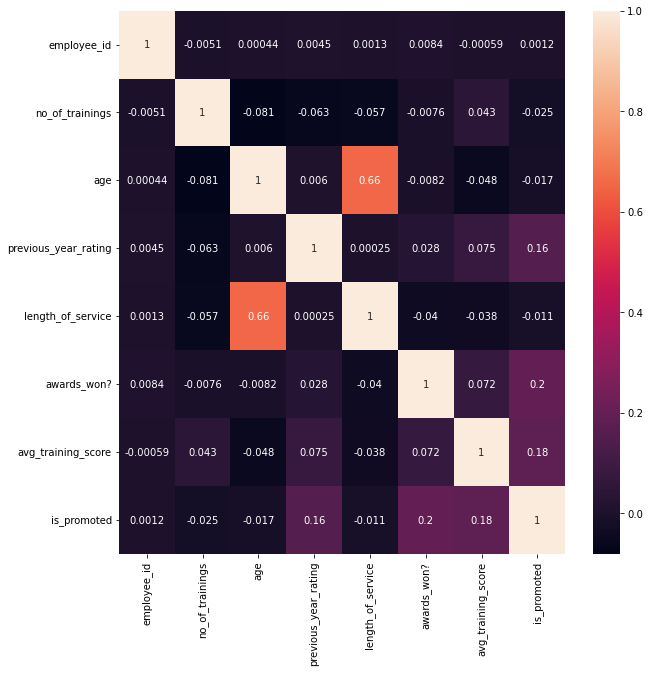

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

# Pre-Processing

# Handling the missing values 

In [7]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Here in the data, variables education and previous year rating has missing values
Lets look the variables in deep and handle the missing values

In [8]:
data['education'].value_counts(normalize=True)

Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: education, dtype: float64

In [9]:
data['previous_year_rating'].value_counts(normalize=True)

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: previous_year_rating, dtype: float64

We can use the mode for handling missing values in education and previous year rating

In [10]:
data['education']= data['education'].fillna(data['education'].mode()[0])
data['previous_year_rating']= data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [11]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Outlier Detection and Handling

C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


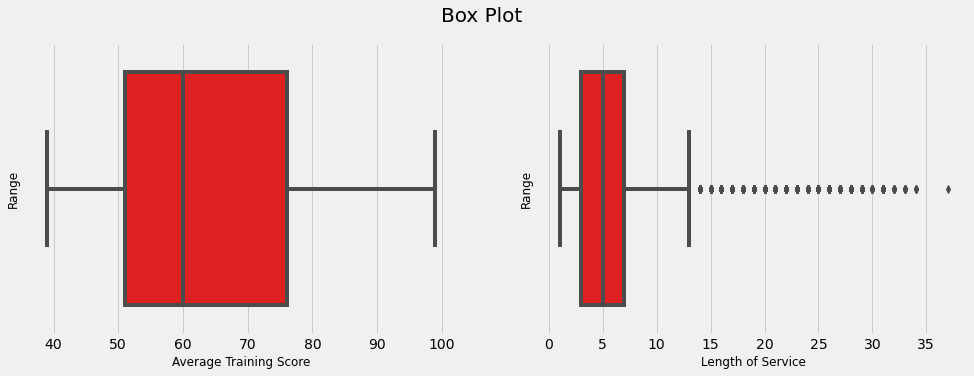

In [12]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(data['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(data['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Range')

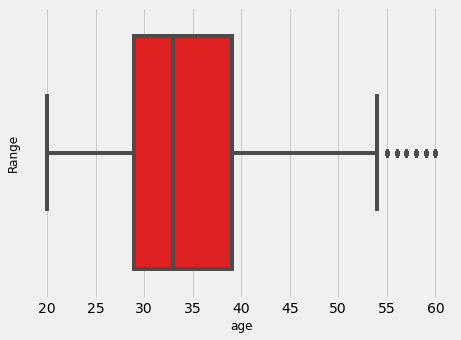

In [13]:
#Box plot for age
plt.subplot(1, 2, 1)
sns.boxplot(data['age'], color = 'red')
plt.xlabel('age', fontsize = 12)
plt.ylabel('Range', fontsize = 12)


Here, the Box plot, helps us to analyze the middle 50 percentile of the data, and we can clearly check the minimum, maximum, median, and outlier values. In the Length of service and age attributes, we can see some points after the Max Value, which can be termed to be as Outliers. We do not need to remove these values, as the values are not very far and Huge.

# Encoding

Here in the data around 5 variables are object varible with different unique values. So we can use label encoder for transforming the varibles for further analysis

In [14]:
# Encoding the non-integer varaibles for further analysis
from sklearn.preprocessing import LabelEncoder
label_en= LabelEncoder()
# Creating a copy of the original data
data_train= data.copy()
a=['department', 'region', 'education', 'gender','recruitment_channel']
for i in np.arange(len(a)):
    data_train[a[i]]= label_en.fit_transform(data_train[a[i]])

In [15]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


In [16]:
data_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,45,0


The encoded data is stored under the data_train label

# Feature Reduction

<AxesSubplot:>

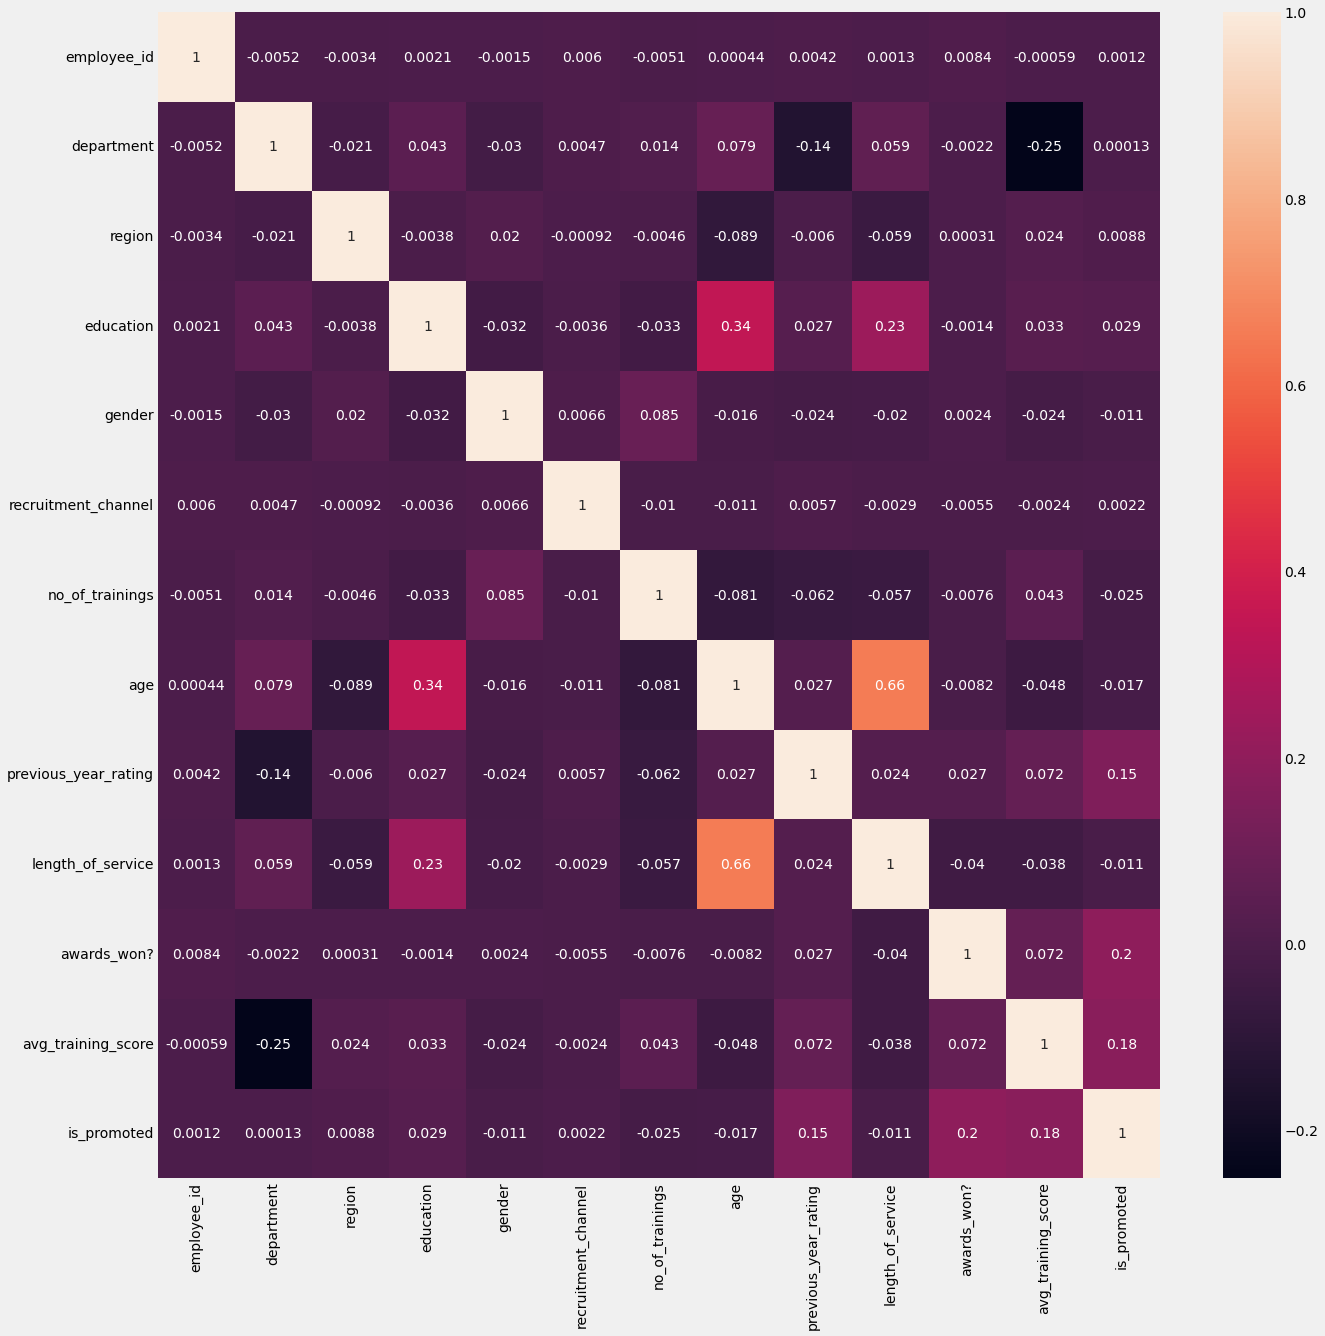

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(),annot=True)

Here if we consider the dataset employee id is different for every employee and removal of that variable won't be affecting the model. The unique value of region is high in number and also its correlation with promotion is low, so removing region also will help in better model creation.

In [18]:
data_train= data_train.drop(['employee_id', 'region'], axis=1)

# Standardisation/Normalization

In [19]:
# lets check descriptive statistics for numerical columns
data_train.describe().style.background_gradient(cmap = 'copper')

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,4.972796,0.559316,0.702379,0.868158,1.253011,34.803915,3.304481,5.865512,0.023172,63.386750,0.085170
std,2.506046,0.889452,0.457216,0.980713,0.609264,7.660169,1.214770,4.265094,0.150450,13.371559,0.279137
min,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,5.000000,0.000000,1.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,7.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,8.000000,2.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


If we consider the different values in the dataset, we can find that there is a non-uniformity in thevalues of the data. so we can use standard scaler for bringing uniformity in the data

In [20]:
data_train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train1= data_train.drop(['is_promoted'],axis=1)
scaler.fit(data_train1)
data_train1 = pd.DataFrame(scaler.transform(data_train1), columns= data_train1.columns, index = data_train1.index)

In [22]:
data_train1

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,0.808933,1.619758,-1.536223,1.154111,-0.415276,0.025598,1.395766,0.500460,-0.154018,-1.075931
1,-0.388183,-0.628838,0.650947,-0.885239,-0.415276,-0.627135,1.395766,-0.437395,-0.154018,-0.253282
2,0.808933,-0.628838,0.650947,1.154111,-0.415276,-0.104948,-0.250651,0.265996,-0.154018,-1.001145
3,0.808933,-0.628838,0.650947,-0.885239,1.226063,0.547785,-1.897069,0.969387,-0.154018,-1.001145
4,1.207972,-0.628838,0.650947,-0.885239,-0.415276,1.331064,-0.250651,-0.906322,-0.154018,0.718939
...,...,...,...,...,...,...,...,...,...,...
54803,1.207972,-0.628838,0.650947,1.154111,-0.415276,1.722704,-0.250651,2.610632,-0.154018,1.092871
54804,-0.388183,1.619758,-1.536223,-0.885239,-0.415276,0.286691,-1.073860,0.031532,-0.154018,-0.552428
54805,-1.984338,-0.628838,0.650947,-0.885239,-0.415276,-1.018775,1.395766,-0.671858,-0.154018,1.167657
54806,0.808933,-0.628838,0.650947,1.154111,-0.415276,-0.757681,-1.897069,-0.906322,-0.154018,-1.375077


In [23]:
Target= data_train['is_promoted']
data_train1= pd.concat([data_train1, Target], axis=1)

The standardized version of the data_train is stored in data_train1 variable

# Feature Engineering 

In [24]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
data_train1['sum_metric'] = data_train1['awards_won?']+ data_train1['previous_year_rating']
data_train['sum_metric'] = data_train['awards_won?']+ data_train['previous_year_rating']

# Removing some more irrelevant columns. 
# We know the recruitment channel also doesn't have much impact on promotions so lets remove recruitment channel

data_train1= data_train1.drop(['recruitment_channel'], axis=1)
data_train= data_train.drop(['recruitment_channel'], axis=1)

In [25]:
# let check the columns and correlation after feature engineering

data_train1.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric'],
      dtype='object')

<AxesSubplot:>

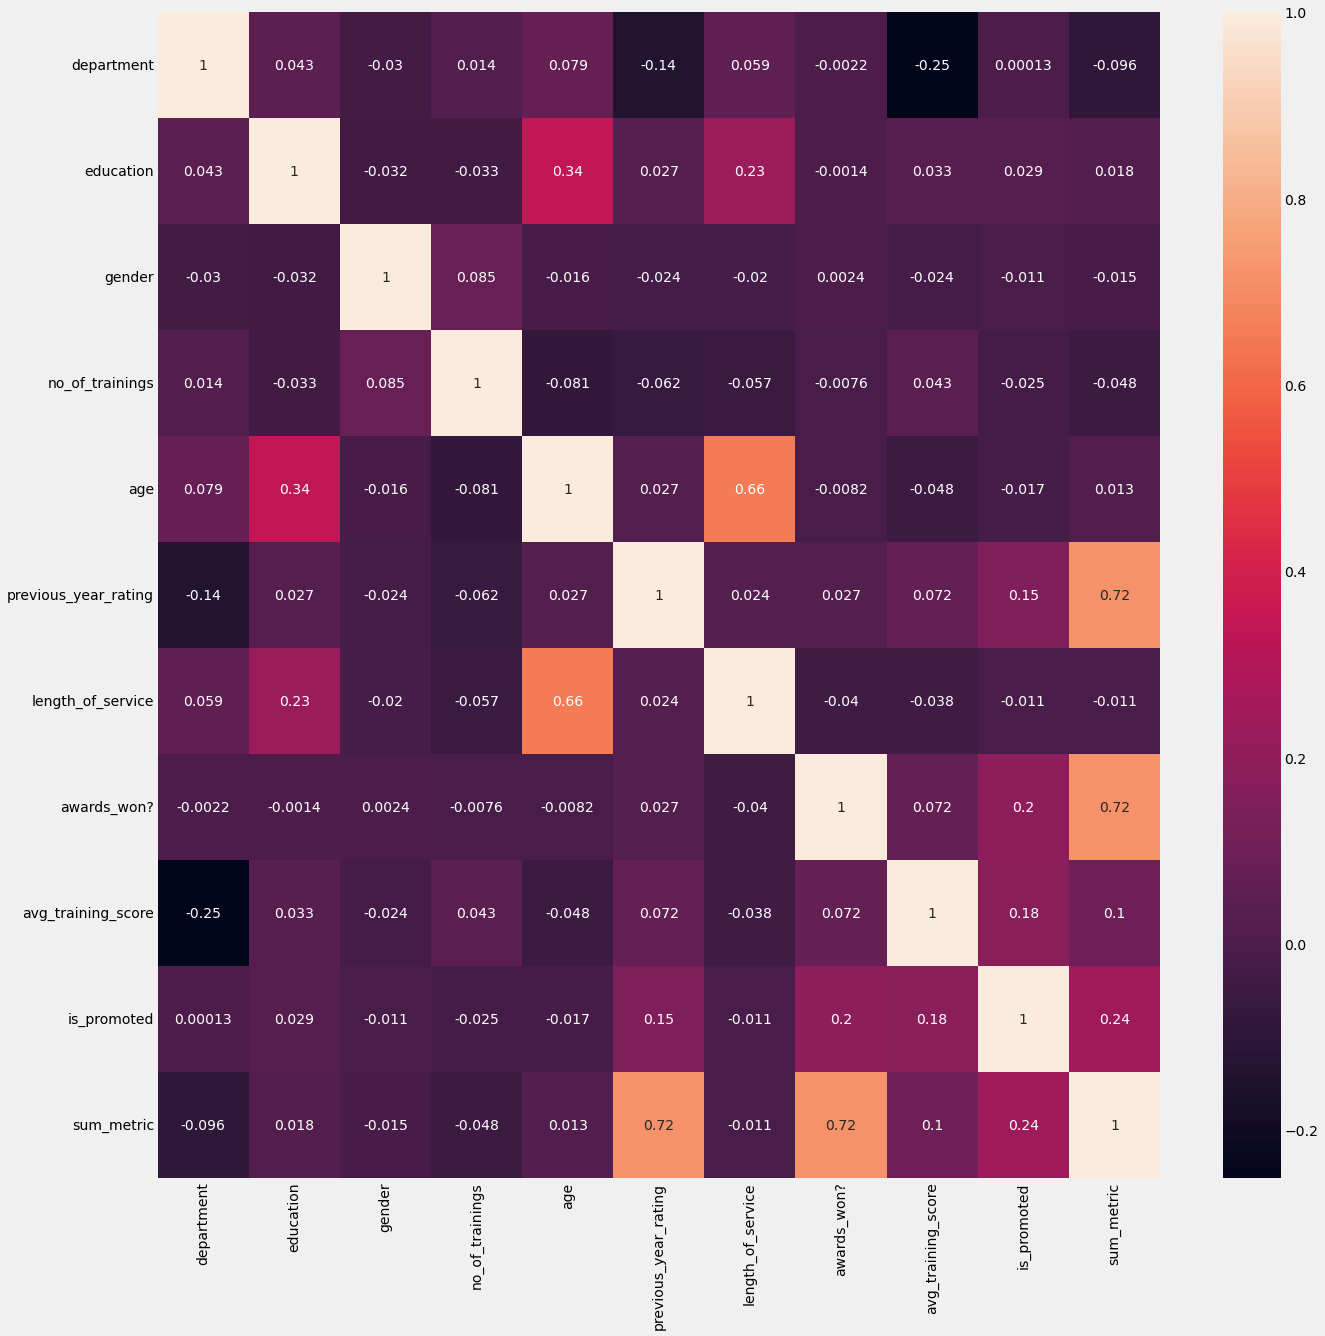

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train1.corr(),annot=True)

# Exploratory Data Analysis


# Univariate Analysis

Lets check individual variables and their nature

Text(0.5, 1.0, 'Department')

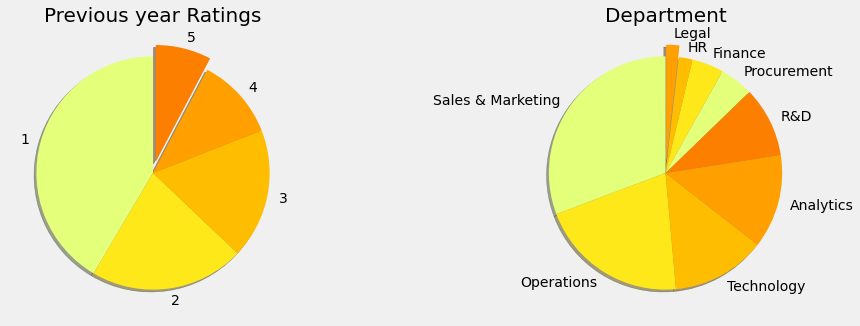

In [27]:
# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 2, 1)
labels = ['1', '2', '3', '4', '5']
sizes = data['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of departments of the employees

plt.subplot(1, 2, 2)
labels= ['Sales & Marketing','Operations','Technology','Analytics','R&D','Procurement','Finance','HR','Legal']
sizes = data['department'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0,0,0,0, 0, 0, 0, 0.1]

plt.pie(sizes, labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Department', fontsize = 20)

C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


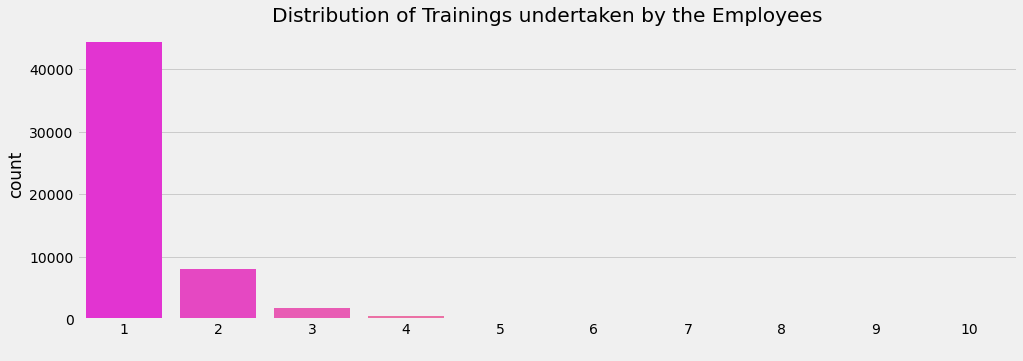

In [28]:
# Plotting the No of training taken by the employees
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 12)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

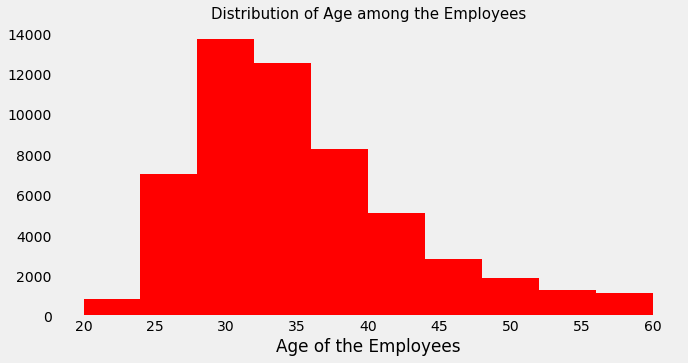

In [29]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(data['age'], color = 'Red')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

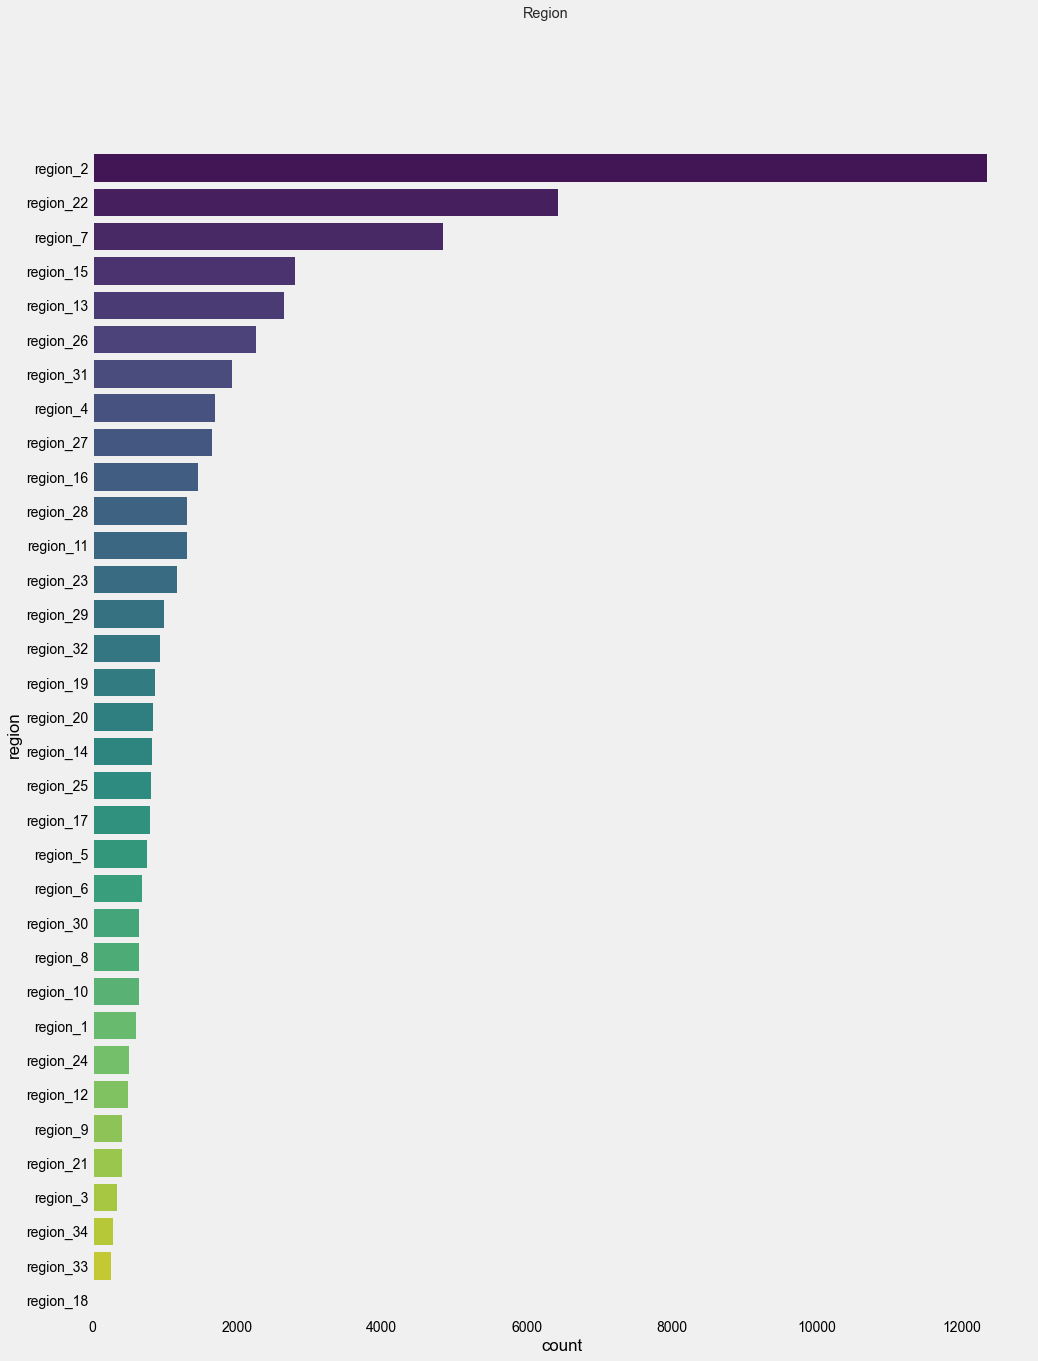

In [30]:
# lets check distribution of different Regions
# categorical features - region
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=data, 
                    palette="viridis", order = data['region'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Region")
plt.show()

# Bivariate Analysis

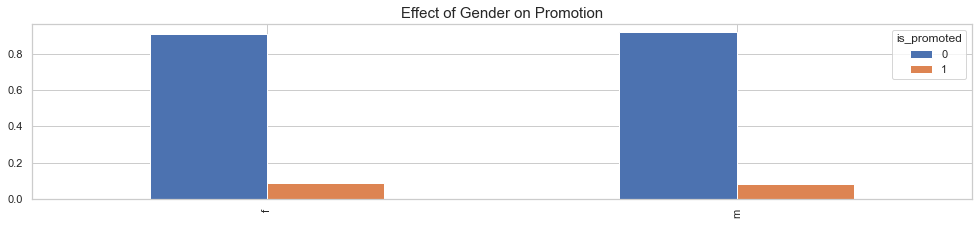

In [31]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(data['gender'], data['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

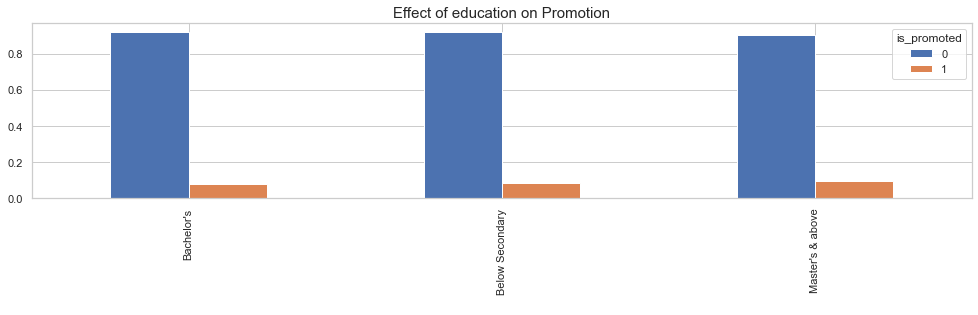

In [32]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(data['education'], data['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of education on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

C:\Users\Stevelal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


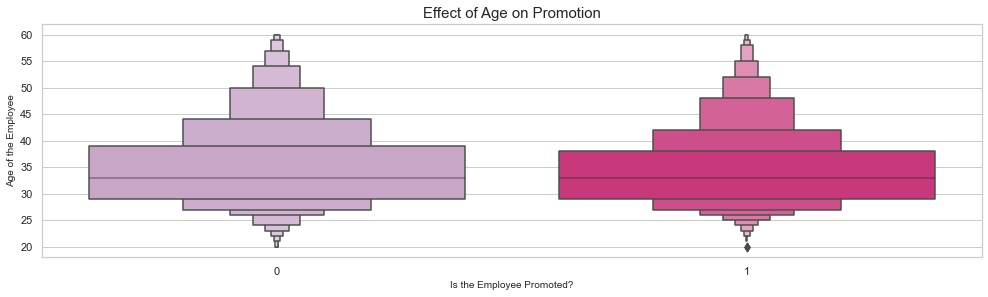

In [33]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(data['is_promoted'], data['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

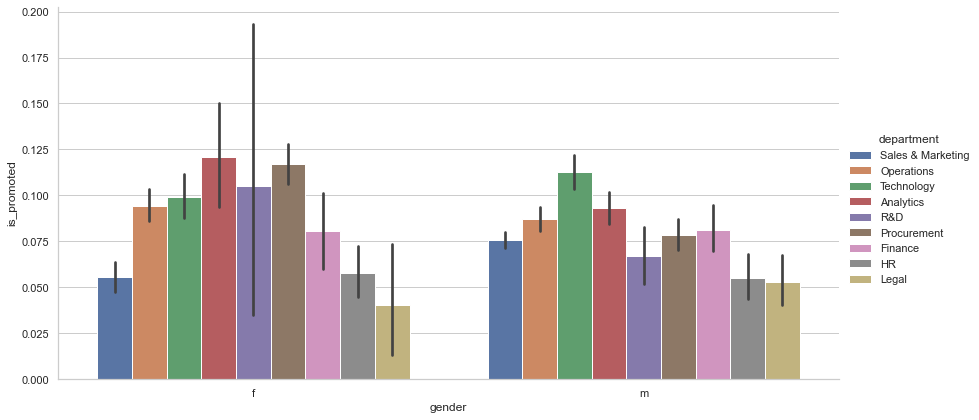

In [34]:
sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=data, height=6, aspect=2)

# Modelling


In [35]:
from sklearn.model_selection import train_test_split

# lets split the target data from the train data

y = data_train1['is_promoted']
x = data_train1.drop(['is_promoted'], axis = 1)
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 30,test_size= 0.2)

In [36]:
# Importing the different models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score

In [37]:
#defining the models

knn_model= KNeighborsClassifier()
Logit_model= LogisticRegression()
svm_model = SVC(kernel = 'rbf', random_state = 0)
rf_model= RandomForestClassifier()
dt_model= DecisionTreeClassifier()
Ab_model= AdaBoostClassifier()

In [38]:
# Fitting the KNeighborsClassifier and printing the scores
knn_model.fit(x_train, y_train)
y_pred= knn_model.predict(x_test)

In [39]:
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.9252873563218391
Recall Score is: 0.19742489270386265
Precision Score: 0.7215686274509804
F1 score is: 0.3100252737994945


C:\Users\Stevelal\AppData\Local\Temp\ipykernel_14380\1858751206.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_14380\1858751206.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,y_test)))
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_14380\1858751206.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,y_test)))
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_14380\1858751206.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(

([<matplotlib.axis.XTick at 0x1f98bf49a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

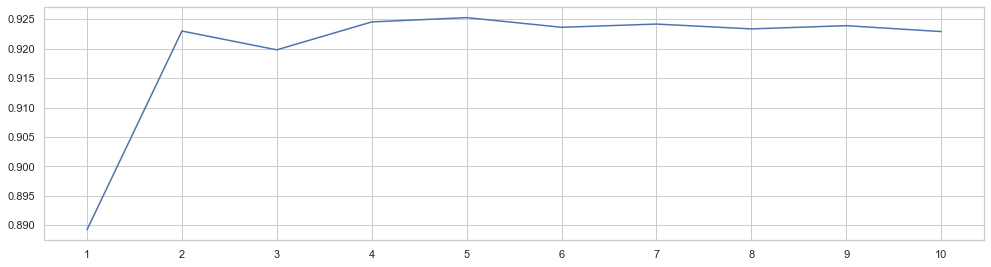

In [40]:
# Checking for optimum n_neighbor value
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [41]:
# Reframing KNN model with optimum n_neighbors value
Knn_model= KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(x_train,y_train)
y_pred= Knn_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.9252873563218391
Recall Score is: 0.19742489270386265
Precision Score: 0.7215686274509804
F1 score is: 0.3100252737994945


In [42]:
# Checking the Logistics Regression model

Logit_model.fit(x_train, y_train)
y_pred1= Logit_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred1))
print('Recall Score is:', recall_score(y_test, y_pred1))
print('Precision Score:', precision_score(y_test, y_pred1))
print('F1 score is:', f1_score(y_test, y_pred1))

Accuracy Score is: 0.9191753329684365
Recall Score is: 0.06974248927038626
Precision Score: 0.7738095238095238
F1 score is: 0.1279527559055118


In [43]:
# Checking the SVM Model

svm_model.fit(x_train, y_train)
y_pred2= svm_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred2))
print('Recall Score is:', recall_score(y_test, y_pred2))
print('Precision Score:', precision_score(y_test, y_pred2))
print('F1 score is:', f1_score(y_test, y_pred2))

Accuracy Score is: 0.921455938697318
Recall Score is: 0.08798283261802575
Precision Score: 0.8817204301075269
F1 score is: 0.16


In [44]:
# Checking with the random forest classifier model

rf_model.fit(x_train, y_train)
y_pred3= rf_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred3))
print('Recall Score is:', recall_score(y_test, y_pred3))
print('Precision Score:', precision_score(y_test, y_pred3))
print('F1 score is:', f1_score(y_test, y_pred3))

Accuracy Score is: 0.9291187739463601
Recall Score is: 0.3283261802575107
Precision Score: 0.6695842450765864
F1 score is: 0.4406047516198704


In [45]:
# Checking with the Decision tree Classifier model
dt_model.fit(x_train, y_train)
y_pred4= dt_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))

Accuracy Score is: 0.8898923554095968
Recall Score is: 0.40772532188841204
Precision Score: 0.3671497584541063
F1 score is: 0.3863751906456533


In [46]:
# Checking with the AdaBoostClassifier model
Ab_model.fit(x_train, y_train)
y_pred5= Ab_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred5))
print('Recall Score is:', recall_score(y_test, y_pred5))
print('Precision Score:', precision_score(y_test, y_pred5))
print('F1 score is:', f1_score(y_test, y_pred5))

Accuracy Score is: 0.9262908228425469
Recall Score is: 0.157725321888412
Precision Score: 0.8647058823529412
F1 score is: 0.26678765880217786


RandomForest Classifier Model gives the best scores in terms of accuracy score, precision score and F1 score

# Model Tunning


In [47]:
# Setting the criterion of RandomForestClassifier as gini and n_estimator as 1000
rf_model = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_model.fit(x_train, y_train)
y_pred6= rf_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred6))
print('Recall Score is:', recall_score(y_test, y_pred6))
print('Precision Score:', precision_score(y_test, y_pred6))
print('F1 score is:', f1_score(y_test, y_pred6))

Accuracy Score is: 0.9389709906951286
Recall Score is: 0.3208154506437768
Precision Score: 0.8925373134328358
F1 score is: 0.47198105761641673


In [48]:
# lets split the target data from the data is not standardised

y = data_train['is_promoted']
x = data_train.drop(['is_promoted'], axis = 1)
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 30,test_size= 0.2)

In [49]:
# Checking the non-standardised data using RandomForest Classifier model
rf_model.fit(x_train, y_train)
y_pred= rf_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.9387885422368181
Recall Score is: 0.3208154506437768
Precision Score: 0.887240356083086
F1 score is: 0.4712371946414499


Without Standardization the Randomforest model scores are slightly less as compared to RandomForest model on standardised data. 

In [50]:
dt_model= DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt_model.fit(x_train, y_train)
y_pred4= dt_model.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))

Accuracy Score is: 0.897555190658639
Recall Score is: 0.39914163090128757
Precision Score: 0.39786096256684494
F1 score is: 0.3985002678093198


Fine Tuning in DecisionTree Classifier model has improved the DecisionTree Model but the model score is not higher than RandomForest Model